<a href="https://colab.research.google.com/github/dinithii/ML/blob/main/FeatureEngineering_outliers_sd%26zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**remove outliers using standard deviation**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/ML/heights (1).csv'
df = pd.read_csv(file_path)
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


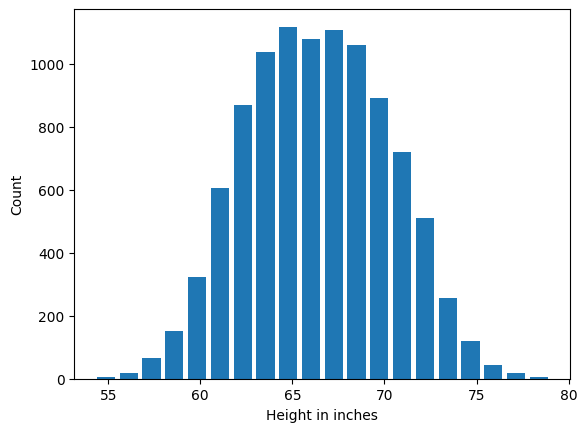

In [3]:
import matplotlib.pyplot as plt
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height in inches')
plt.ylabel('Count')
plt.show()

In [4]:
df.height.min()

54.26313333

In [5]:
df.height.max()

78.99874235

In [6]:
df.height.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


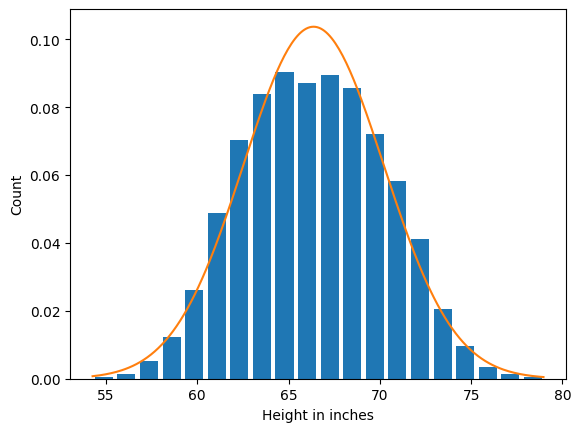

In [7]:
from scipy.stats import norm
import numpy as np

plt.hist(df.height, bins=20, rwidth=0.8, density= True)
plt.xlabel('Height in inches')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

In [10]:
df.height.mean()

np.float64(66.367559754866)

In [11]:
df.height.std()

3.847528120795573

In [13]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

np.float64(77.91014411725271)

In [14]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

np.float64(54.824975392479274)

In [16]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [18]:
df2 = df[(df.height>lower_limit) & (df.height<upper_limit)]
df2

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [19]:
df.shape

(10000, 2)

In [20]:
df2.shape

(9993, 2)

**remove outliers using z-score**

In [21]:
df['zscore'] = (df.height - df.height.mean()) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [22]:
(68.781904 - 66.367559754866) / 3.84

0.6287354805036468

In [23]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [24]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [25]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [29]:
df3 = df[(df.zscore>-3) & (df.zscore<3)]
df3

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [28]:
df.shape

(10000, 3)

In [33]:
df3.shape

(9993, 3)